Testing If Google Drive is mounted

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [27]:
ls

drive/  flowers.h5  sample_data/


In [28]:
cd/content/drive/MyDrive/assignment 3


/content/drive/MyDrive/assignment 3


In [29]:
ls

flowers/  Flowers-Dataset.zip


In [30]:
pwd

'/content/drive/MyDrive/assignment 3'

In [ ]:
!unzip Flowers-Dataset.zip

Image Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [18]:
 test_datagen= ImageDataGenerator(rescale=1./255)

In [19]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/assignment 3/flowers/training",target_size=(64,64),class_mode='categorical',batch_size=75)


Found 4317 images belonging to 5 classes.


In [20]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/assignment 3/flowers/testing",target_size=(64,64),class_mode='categorical',batch_size=75)


Found 1212 images belonging to 5 classes.


In [21]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Model

In [3]:
from tensorflow.keras.models import Sequential

Layers

In [4]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [5]:
model = Sequential()

In [6]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3),activation = 'relu')) #Feature map

In [7]:
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix

In [8]:
model.add(Flatten())

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [11]:
model.add(Dense(5,activation='softmax'))

Compile

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
len(x_train)

58

In [23]:
len(x_test)

17

Fit the Model

In [24]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
58/58 [==============================] - 796s 14s/step - loss: 1.8274 - accuracy: 0.3410 - val_loss: 1.1998 - val_accuracy: 0.5264
Epoch 2/10
58/58 [==============================] - 38s 645ms/step - loss: 1.1648 - accuracy: 0.5129 - val_loss: 1.1033 - val_accuracy: 0.5545
Epoch 3/10
58/58 [==============================] - 37s 642ms/step - loss: 1.0619 - accuracy: 0.5719 - val_loss: 1.0040 - val_accuracy: 0.6295
Epoch 4/10
58/58 [==============================] - 39s 674ms/step - loss: 1.0047 - accuracy: 0.6067 - val_loss: 0.9854 - val_accuracy: 0.6386
Epoch 5/10
58/58 [==============================] - 37s 643ms/step - loss: 0.9386 - accuracy: 0.6340 - val_loss: 1.0235 - val_accuracy: 0.6188
Epoch 6/10
58/58 [==============================] - 38s 646ms/step - loss: 0.8861 - accuracy: 0.6609 - val_loss: 0.7772 - val_accuracy: 0.7054
Epoch 7/10
58/58 [==============================] - 39s 676ms/step - loss: 0.8445 - accuracy: 0.6662 - val_loss: 0.9096 - val_accuracy: 0.6436


Save the model

In [31]:
model.save('flowers.h5')

In [32]:
ls

flowers/  Flowers-Dataset.zip  flowers.h5


Test the model

In [33]:
import numpy as np
from tensorflow.keras.models import load_model

In [34]:
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('flowers.h5')

In [36]:
pwd

'/content/drive/MyDrive/assignment 3'

In [39]:
img=image.load_img(r'/content/drive/MyDrive/assignment 3/flowers/testing/daisy/102841525_bd6628ae3c.jpg')

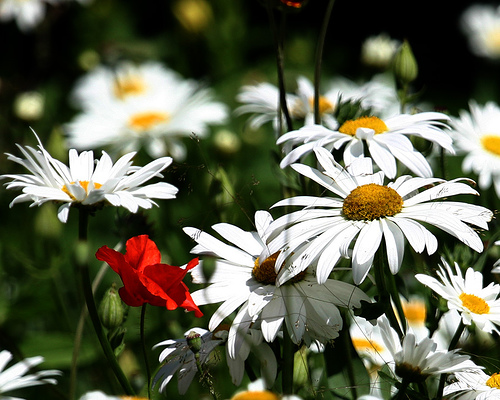

In [40]:
img

In [41]:
img=image.load_img(r'/content/drive/MyDrive/assignment 3/flowers/testing/daisy/102841525_bd6628ae3c.jpg',target_size=(64,64))

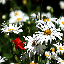

In [42]:
img

In [43]:
x=image.img_to_array(img)

In [44]:
x

array([[[180., 178., 157.],
        [203., 204., 190.],
        [201., 205., 180.],
        ...,
        [ 17.,  23.,  21.],
        [ 12.,  18.,  16.],
        [  9.,  13.,  12.]],

       [[200., 199., 179.],
        [187., 188., 190.],
        [190., 195., 189.],
        ...,
        [105., 117., 115.],
        [105., 116., 112.],
        [ 69.,  75.,  73.]],

       [[130., 132., 121.],
        [101., 101.,  99.],
        [152., 154., 149.],
        ...,
        [175., 181., 179.],
        [190., 205., 200.],
        [144., 157., 150.]],

       ...,

       [[213., 228., 225.],
        [246., 248., 247.],
        [236., 240., 239.],
        ...,
        [245., 247., 242.],
        [255., 187.,  31.],
        [239., 185.,  14.]],

       [[187., 198., 184.],
        [ 47.,  61.,  46.],
        [ 15.,  26.,   9.],
        ...,
        [224., 223., 218.],
        [243., 250., 243.],
        [255., 255., 251.]],

       [[ 65.,  80.,  59.],
        [ 44.,  57.,  47.],
        [ 21.,  

In [45]:
x.shape

(64, 64, 3)

In [46]:
x= np.expand_dims(x,axis=0)

In [47]:
x

array([[[[180., 178., 157.],
         [203., 204., 190.],
         [201., 205., 180.],
         ...,
         [ 17.,  23.,  21.],
         [ 12.,  18.,  16.],
         [  9.,  13.,  12.]],

        [[200., 199., 179.],
         [187., 188., 190.],
         [190., 195., 189.],
         ...,
         [105., 117., 115.],
         [105., 116., 112.],
         [ 69.,  75.,  73.]],

        [[130., 132., 121.],
         [101., 101.,  99.],
         [152., 154., 149.],
         ...,
         [175., 181., 179.],
         [190., 205., 200.],
         [144., 157., 150.]],

        ...,

        [[213., 228., 225.],
         [246., 248., 247.],
         [236., 240., 239.],
         ...,
         [245., 247., 242.],
         [255., 187.,  31.],
         [239., 185.,  14.]],

        [[187., 198., 184.],
         [ 47.,  61.,  46.],
         [ 15.,  26.,   9.],
         ...,
         [224., 223., 218.],
         [243., 250., 243.],
         [255., 255., 251.]],

        [[ 65.,  80.,  59.],
       

In [48]:
x.shape

(1, 64, 64, 3)

In [49]:
y= np.argmax(model.predict(x),axis=1)

In [50]:
y

array([0])

In [51]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [52]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [53]:
index[y[0]]

'daisy'

In [56]:
img=image.load_img(r'/content/drive/MyDrive/assignment 3/flowers/testing/rose/1469726748_f359f4a8c5.jpg',target_size=(64,64))

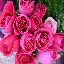

In [57]:
img

In [58]:
x=image.img_to_array(img)

In [59]:
x=np.expand_dims(x,axis=0)

In [60]:
y=np.argmax(model.predict(x),axis=1)

In [61]:
y

array([2])

In [62]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [63]:
index[y[0]]

'rose'